In [ ]:
# Raphael_PVT.py d/f PE251_Project_v12
# 16-09-2020
# Version for Git Hub
#-------------------------------------
#PE251_Project_v12 d/f PE25_Project_v11
# 21-08-2020
#1. To test the crashes with z8
#2. And see if I can dow away by callin EOS function 3 times.
#--------------------------------------------------------
#PE251_Project_v11 d/f PE251_Project_V9
# 17-07-2020
#Help create Undersaturated line for PVTO for Condesate
#--------------------------------------
#PE251_Project_v9 d/f PE251_Project_V8
#15-07-2020
# Check that it works for Gas Condensates
#-------------------------
#PE251_Project_v8 d/f PE251_Project_v7
#12-07-2020
# to fix the issue with z3 fluid
# The issue was the firt guess value for V in the Flash Equation
#--------------------------------
#PE251_Project_v7 d/f PE251_Project_v5
#-------Caution---------------
# LBC Viscosity calculation is still being improved
# At present its value is 5 times more than that given by commercial simulator
#-----------------------------------
#26-06-2020
# The values for Pc, Tc,acent and Vcrit have been modified (accidentally in PE251-Project_V4)
# So this shall be deleted
#-----------------------------------
#PE251-Project_V5 d/f PE251-Project_V4
#18-06-2020
# To fix issues with composition in Table 10.6, Page 211
#-------------------------
#User Input
# Composition is in Mole Fractions: Please ensure they add up to 1.00
#Sample Compostion

#z1={'N2':0.00291,'CO2':0.00481,'C1':0.17813,'C2':0.01454,'C3':0.02914,'iC4':0.01146,
#   'nC4':0.0275,'iC5':0.01769,'nC5':0.02425,'C6':0.03949,'C7':0.04976,'C8':0.05467,   'C9':0.04387,'C10':0.50178}
# Volve Data Set: Mathematically Recombined Samples
z1={'N2':0.0047,'CO2':0.0162,'C1':0.4012,'C2':0.0587,'C3':0.0547,'iC4':0.0078,'nC4':0.0285,
  'iC5':0.0107,'nC5':0.0167,'C6':0.0227,'C7':0.0344,'C8':0.0313,'C9':0.023,'C10':0.2894}

#--Gas Condensate
#z1={'CO2': 0.0018,'N2':0.0013,'C1':0.6192, 'C2': 0.1408,'C3':0.0835,'iC4':0.0097,'nC4':0.0341,'iC5':0.0084,
#   'nC5':0.0148,'C6':0.0179,'C7':0.0685}
#z1={'CO2': 0.0569,'N2':0.0037,'C1':0.86,'C2':0.0348,'C3':0.0152,'iC4':0.0036,'nC4':0.0044,
#    'iC5':0.0016,'nC5':0.0012,'C6':0.0018,'C7':0.0021,'C8':0.0024,'C9':0.0024,'C10':0.0011,
#    'C11':0.0012,'C12':0.0014,'C13':0.0011,'C14':0.0013,'C15':0.0010,'C16':0.0028}
#z1={'CO2': 0.0569,'N2':0.0037,'C1':0.86,'C2':0.0348,'C3':0.0152,'iC4':0.0036,'nC4':0.0044,
#    'iC5':0.0016,'nC5':0.0012,'C6':0.0018,'C7':0.0021,'C8':0.0024,'C9':0.0024,'C10':0.0099}
#z1={'C1':0.2,'C2':0.1,'C6':0.2,'C10':0.5}
# Res Temperature (Degree F)
T_res= 232
# Pressures 
P_list=[100,200,300,400,500,900,1250,1500,1750,2000,2250,2500,3000,3500,4000,4500,5000]
#P_list=[400,3000]
#--------------------------
#Specify the Fluid Type (oil or gas)
fluid_type='Oil'
fluid=fluid_type.upper()
# Separator Stages
num_stages=1
#SepStage 1
# Psep1 (psia), Tsep (Degree F)
Psep1=14.7
Tsep1=60
#SepStage 2
#Psep2 (psia), Tsep (Degree F)
Psep2=14.7
Tsep2=60
#
# The Initial guess value for Vapour Fraction
# In case of convergence PROBLEMS ty modifying this value
# guessV is between 0.0 and 1.0
guessV=0.5


In [ ]:
# By Mansoor Hussain
# PE251-Project_v4 to incorporate LBC Viscosity
# 06-06-2020
#------------------------------
# Create Dictionries to access properties of the components
# commenced on 23-12-2019
#---------------------------------------------------------
# This is now complete as it can now calculate Bo and Rs
# Monday 23-12-2019
#---------------------------------------------------------
#Modify all terms to follow PVTi manual 17-11-2019
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
#import LBC1
#import pedersen1
#-----------------------------------
#Fixed Input: Please do not modify
#-----------------------------------
# R=10.732 psi.ft3/lb-mole.R
R=10.732
#Pc={'CO2':1070,'C1':667,'C5':489,'C16':266}
Pc={'N2':492.31,'CO2':1070,'H2S': 1296.2,'C1': 667,'C2':708.34,'C3':615.76,'iC4':529.3,'nC4':550.7,
    'iC5':491.58,'nC5':488.79,'C6':435.9,'C7':426.18,'C8':417.66,'C9':381.51,'C10':350.94,
    'C11':323.46,'C12':301.71,'C13':284.22,'C14':269.82,'C15':255.27,'C16':240.72}
#Critical Temperature Tc in Rankine 
#Tc={'CO2':548,'C1':344,'C5':846,'C16':1185}
Tc={'N2':227.49,'CO2':672.81,'H2S':672.81,'C1': 343.41,'C2':551.04,'C3':665.97,'iC4':734.91,'nC4':765.69,
   'iC5':829.05,'nC5':845.61,'C6':913.83,'C7':986.73,'C8': 1035.33,'C9':1085.73,'C10':1127.13,
    'C11':1166.73,'C12':1202.73,'C13':1236.93,'C14':1271.13,'C15':1303.53,'C16':1330}
#acentricity factor
#acent={'CO2':0.225,'C1':0.008,'C5':0.251, 'C16':0.575}
acent={'N2':0.045,'CO2':0.225,'H2S':0.10,'C1':0.013,'C2':0.0986,'C3':0.1524,'iC4':0.1848,'nC4':0.201,
      'iC5':0.227,'nC5':0.251,'C6':0.299,'C7':0.30,'C8':0.312,'C9':0.348,'C10':0.385,
       'C11':0.419,'C12':0.454,'C13':0.484,'C14':0.516,'C15':0.55,'C16':0.582}
MW={'N2':28,'CO2':44,'H2S':32,'C1':16,'C2':30,'C3':44,'iC4':58,'nC4':58,
    'iC5':72,'nC5':72,'C6':86,'C7':100,'C8':114,'C9':128,'C10':142,'C11':156,'C12':170,
    'C13':184,'C14':198,'C15':212,'C16':226}   
Vc={'N2':1.4417,'CO2':1.5698,'H2S': 1.55057,'C1':1.5698,'C2':2.3707,'C3':3.2037,'iC4':4.2129,'nC4':4.0817,
   'iC5':4.93377,'nC5':4.9817,'C6':5.6225,'C7':6.2792,'C8':6.937,'C9':7.7529,'C10':8.5539,
    'C11':9.4028,'C12':10.204,'C13':10.941,'C14':11.693,'C15':12.478,'C16':13.311}

#BIC={'CO2':{'CO2':0.00,'C1':0.15,'C5':0.00,'C16':0.00}, 
#      'C1':{'CO2':0.15,'C1':0.00,'C5':0.02,'C16':0.05}, 
#      'C5':{'CO2':0.00,'C1':0.02,'C5':0.00,'C16':0.00}, 
#     'C16':{'CO2':0.00,'C1':0.05,'C5':0.00,'C16':0.00}}
#---------- N2  CO2  H2S   C1
BIC={'N2' :{'N2':0.00, 'CO2':0.00, 'H2S':0.00, 'C1':0.025, 
            'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
    'CO2' :{'N2':0.00, 'CO2':0.00, 'H2S': 0.00, 'C1':0.15,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0,'C15':0,'C16':0},
    'H2S' :{'N2':0.13, 'CO2':0.135,'H2S':0.00, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C1' :{'N2':0.025,'CO2':0.15,'H2S':0.07, 'C1':0.00,
            'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0.02,'nC5':0.02,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0.05},
     'C2' :{'N2':0.01, 'CO2':0.13 ,'H2S':0.085,'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C3' :{'N2':0.09, 'CO2':0.125, 'H2S':0.080,'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'iC4':{'N2':0.095, 'CO2':0.12, 'H2S':0.075, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'nC4':{'N2':0.095, 'CO2':0.115,'H2S':0.075, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'iC5':{'N2':0.100, 'CO2':0.00, 'H2S':0.070, 'C1':0.02,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'nC5':{'N2':0.110, 'CO2':0.00, 'H2S':0.070, 'C1':0.02,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C6': {'N2':0.110, 'CO2':0.115, 'H2S':0.055, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C7': {'N2':0.110, 'CO2':0.115, 'H2S':0.050, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C8': {'N2': 0.110, 'CO2':0.115,  'H2S':0.048, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C9': {'N2':0.110, 'CO2':0.115, 'H2S':0.046, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C10':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C11':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C12':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C13':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},  
     'C14':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},    
     'C15':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     #--The numbers in C16 line are arbitrary
     'C16':{'N2':0.110, 'CO2':0.115, 'C5':0.000, 'C1': 0.05,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0}}
        


In [3]:
#---------------
# Tuning
# Specify highest Fraction
#---------------
Pc['C10']=Pc['C10']*1.0
Tc['C10']=Tc['C10']*1.0

In [4]:
def check_sum_func(z1):
#Check if the sum=1.0
 if abs(sum(z1.values())-1.0)>0.001:
   print ('sum of mole fractions=',sum(z1.values()))
   print ('Check your Sample Composition')
 else:
    print ('sum of mole fraction=',sum(z1.values()))
check_sum_func(z1)

sum of mole fraction= 1.0
sum of mole fraction= 1.0


In [5]:
#----This function is NOT used------
def criticals_fluid_func(z):
 Tc_fluid=0
 Pc_fluid=0
 for i in z:
    Tc_fluid=Tc_fluid+z[i]*Tc[i]
    Pc_fluid=Pc_fluid+z[i]*Pc[i]
 print ('Tc_fluid=',Tc_fluid, 'Pc_fluid=', Pc_fluid)
 return Tc_fluid, Pc_fluid

In [6]:
def wilson(P,T_R,comp_list):
 #kval2 and k1 are temperary variables.
 #kount=0
 kval={}
 for key in comp_list:
 #while kount<len(comp_list):
  #Pc[key]
  kval2=(Pc[key]/P)*(np.exp(5.37*(1+acent[key])*(1-Tc[key]/T_R)))
  kval[key]=kval2                
  #kount=kount+1
 return kval

In [7]:

def flash(comp_list,kval,V): 
# V is the first guess 
 #print ('--------flash-------')
 #k1=0 
 F_0=0 
 F_1=0 
 fv=0 
 dfv=0 
 #while k1< len(comp_list): 
 for k1 in comp_list:
  F_0=F_0+comp_list[k1]*(kval[k1]-1) 
  F_1=F_1+(comp_list[k1]*(kval[k1]-1.0)) /kval[k1]
  fv= fv+ (kval[k1]-1.0)*comp_list[k1]/(1.0+(kval[k1]-1.0)*V) 
  dfv= dfv-(comp_list[k1])*(kval[k1]-1)**2/(1+(kval[k1]-1)*V)**2
  #print ('ok1',z_list[k1], kval[k1])
  #k1=k1+1
 return F_0,F_1, fv, dfv

In [8]:
def V_calc(kval,comp_list,V):
  #print ('-----V_calc------------')
 # x1 and y1 are temporary variables to hold values for xi and yi
  VNEW=V
  F_0,F_1,fv,dfv=flash(comp_list,kval,VNEW)
  #print ('F_0=',F_0,'F_1=',F_1)
  #if F_0>=0 and F_1<=0:
  while abs(-fv/dfv)>0.00001 and VNEW>=0 and VNEW<=1.0:
    F_0,F_1,fv,dfv=flash(comp_list, kval,VNEW)
    VNEW=VNEW-fv/dfv
 #   print ('Inside V_calc, VNEW=',VNEW)
    #print ('fv=',fv,'dfv=',dfv,'VNEW=',VNEW)
  #elif  F_1>0.0:
  #  VNEW=1.0
  #elif F_0<0:
  #  VNEW=0.0
    #print ('VNEW=',VNEW, 'fv=',fv, 'dfv=', dfv)
 #else:
  #  print ("Only one Phase")
  #print ('ok2')
  #print ('VNEW=',VNEW)
  if VNEW>1.0:
    VNEW=1.0
  if VNEW<0.0:
    VNEW=0.0
  
  return F_0,F_1,VNEW


    
def liq_vap_molfrac(kval,comp_list,V):
 #print('----liq_vap_molfrac----------')
 F_0,F_1,V= V_calc(kval,comp_list,V)
 #print('V=',V)
 
 xlist={}
 ylist={}
 #if F_0>=0 and F_1<=0:
# print ('ok1')
 #k1=0
 #while k1< len(comp_list):
 for k1 in comp_list:
    #x1='{:.2f}'.format(comp_list[k1]/(1+V*(kval[k1]-1)))
    #y1='{:.2f}'.format(kval[k1]*x1)
    x1=comp_list[k1]/(1+V*(kval[k1]-1))
    y1=kval[k1]*x1
    
    xlist[k1]=x1
    ylist[k1]=y1
    #xlist.append(x1)
    #ylist.append(y1)
   # k1=k1+1
    L=1-V
 #elif  F_1>0:
 #   print ('ok2')
 #   V=1.0
 #   L=0.0
 #   ylist=comp_list
 #   for i in range(0,len(comp_list)):
 #    xlist.append(0.0)
 #elif F_0<0:
 #   print ('ok3')
 #  V=0.0
 #   L=1.0
 #   xlist=comp_list
 #   for i in range(0,len(comp_list)):
 #    ylist.append(0.0)
   
 #print ('x=', "%.2f" % x1, 'y=',"%.2f" % y1)
 #print ('ok3')
 #print ( 'kval=',kval)
 #print ('L=',L, 'V=',V)
 return F_0,F_1,xlist,ylist,L,V
  

In [9]:
# Following PVTi Manual
# Calcuation of Aj=OmegaA(T,j)*Prj/Trj^2 Eq. 7.98
#---------------------
def a_calc1(P,T_R,comp_list):
 OmegaA0=0.457235529
 Pr={}
 Tr={}
 OmegaA={}
 Aj={}
 #i=0
 for key in comp_list:
 #while i < len(comp_list):
  Pr[key]=(P/Pc[key])
  Tr[key]=(T_R/Tc[key])
 #while i < len(z_list):
  OmegaA[key]=(OmegaA0*(1+(0.37464+1.54226*acent[key]-0.2669*acent[key]**2)
                     *(1-mt.sqrt(Tr[key])))**2)
  Aj[key]=OmegaA[key]*(P/Pc[key])/(T_R/Tc[key])**2
  #i=i+1
 return Aj

# Eq 7.97 PVTi manual
# Eq 7.95 PVTi manual
#-----------------------
def a_calc2(P,T_R,comp_list):
 Ajk=0
 S={}
 Aij=[[],[]]
 A=0
 Aj=a_calc1(P,T_R,comp_list)
 S_temp=0
 #i=0
 #while i < len(comp_list):
 for i in comp_list:
 # j=0
  #while j < len(comp_list):
  for j in comp_list:
  #while j <= i:
   #if (i != j):
    try:
     BIC_temp=BIC[i][j]
    except:
     BIC_temp=0.0
    
#    Ajk=(1-BIC[i][j])*mt.sqrt(Aj[i]*Aj[j])
    Ajk=(1-BIC_temp)*mt.sqrt(Aj[i]*Aj[j])
    Aij.append(Ajk)

    A=A+Ajk*comp_list[i]*comp_list[j]
    S_temp=S_temp+Ajk*comp_list[j]
    #print ('i=',i,'j=',j,'Ajk=',Ajk, 'A=',A)
    #print (comp_list[i],comp_list[j])
    #+Ajk*comp_list[j]
    #j=j+1
  S[i]=(S_temp)
  S_temp=0
  #i=i+1
 #print ('A=',A,'S=',S)
 return A,S

   

In [10]:

def b_calc(P,T_R,comp_list):
 OmegaB0=0.077796074
 Pr=[]
 Tr=[]
 Bj={}
 xBj={}
 B=0
 #i=0
 #while i < len(comp_list):
 for i in comp_list:
  #Pr.append(P/Pc[i])
  #Tr.append(T_R/Tc[i])
  Pr=P/Pc[i]
  Tr=T_R/Tc[i]
  Bj[i]=OmegaB0*Pr/Tr
  #Bj.append(OmegaB0*Pr/Tr)
  xBj[i]=Bj[i]*comp_list[i]
 # Bj.append(OmegaB0*Pr[i]/(Tr[i])
 # Bj.append(OmegaB0*Pr[i]/Tr[i])
 # print ('bi=',bi, 'z_list=', z_list)
  B = 0
  for i in xBj: 
    B= B + xBj[i] 
      
 # i=i+1
 #print ('b_calc')
 #print ('Bj=',Bj,'B=',B)
 return B,Bj


In [11]:
def eos_zeta(A,B):
# Eq. 790 to Eq.792
# zeta as in PV=zetaRT
 zeta_liq=0
 zeta_vap=0
 zeta_single=0
 m1=1+np.sqrt(2)
 m2=1-np.sqrt(2)
 E2=(m1+m2-1)*B-1
 E1=A-(2*(m1+m2)-1)*B**2-(m1+m2)*B
 E0= -(A*B+m1*m2*B**2*(B+1))
 #E0E1E2=[E0,E1,E2]
 NROOT, zeta1,zeta2,zeta3= cubroot(E2,E1,E0)
 #[zeta_list2]=np.roots[E0,E1,E2]
 #print ('-----eos_zeta----------')
 #print ('A=',A, 'B=',B)
 #print ('E2=',E2,'E1=',E1,'E0=',E0)
 #print ('NROOT=',NROOT, 'zeta1=',zeta1,'zeta2=',zeta2,'zeta3=',zeta3)
 zeta_list=[zeta1,zeta2,zeta3]
 zeta_list = [i for i in zeta_list if i >= 0.0]
 # Number of Roots Real and Positive
 NROOT_r_p=len(zeta_list)
 #print ('---eos_zeta-------')
 #print ('NROOT=',NROOT,'zeta=',zeta_list)
 zeta_list.sort()
 if NROOT_r_p==0:
   zeta_single=0.0
 elif NROOT_r_p==1:
  zeta_single=zeta_list[0]
 elif NROOT_r_p>1:
  zeta_liq=zeta_list[0]
  zeta_vap=zeta_list[-1]
 return NROOT_r_p,zeta_single,zeta_liq,zeta_vap

#function liq_vap_zeta is not called
def liq_vap_zeta(P,T_R,comp_list):
 A,S=a_calc2(P,T_R,comp_list)
 B,Bj=b_calc(P,T_R,comp_list)
 NROOT, zeta_single, zeta_liq,zeta_vap=eos_zeta(A,B)
 #print ('NROOT=',NROOT,'zeta_single=', zeta_single, 'zeta_liq=',zeta_liq, 'zeta_vap=',zeta_vap)
 return zeta_single, zeta_liq, zeta_vap

def liq_zeta(P,T_R,xlist):
 A,S=a_calc2(P,T_R,xlist)
 B,Bj=b_calc(P,T_R,xlist)
 NROOT_r_p, zeta_single, zeta_liq,zeta_vap=eos_zeta(A,B)
 if NROOT_r_p==0 or NROOT_r_p==1:
  zeta=zeta_single
 elif NROOT_r_p>1:
  zeta=zeta_liq
 #print ('-----liq_zeta-----')
 #print ('NROOT=',NROOT)
 #print ('zeta_single=',zeta_single)
 #print ('zeta_liq=',zeta_liq,'zeta_vap=',zeta_vap)
 #print('zeta=',zeta)
 return zeta

def vap_zeta(P,T_R,ylist):
 A,S=a_calc2(P,T_R,ylist)
 B,Bj=b_calc(P,T_R,ylist)
 NROOT_r_p, zeta_single, zeta_liq, zeta_vap=eos_zeta(A,B)
 #print ('NROOT=',NROOT, 'zeta_single=',zeta_single)
 if NROOT_r_p==0 or NROOT_r_p==1:
  zeta=zeta_single
 elif NROOT_r_p>1:
  zeta=zeta_vap
 #print ('-----vap_zeta-----')
 #print ('NROOT=',NROOT)
 #print ('zeta_single=',zeta_single)
 #print ('zeta_liq=',zeta_liq,'zeta_vap=',zeta_vap)
 #print ('zeta=',zeta)
 return zeta

In [12]:
#Eq 7.93 PVTi manual
def fugacity(P, T_R, zeta,comp_list):
# need to call eos_vol
 fug={}
 #print ('zeta=',zeta)
 #print ('comp_list=',comp_list)
 B,Bj=b_calc(P,T_R,comp_list)
 A,S=a_calc2(P,T_R,comp_list)
 #print ('fugacity')
 #print ('A=', A, 'Bj=',Bj,'B=',B,'zeta=',zeta)
 
 #----------------------------
 m1=1+np.sqrt(2)
 m2=1-np.sqrt(2)

 #i=0
 for i in comp_list:
 #while i < len(comp_list):
 # subdivide the equation to make calculation easier:

  fug1=-np.log(zeta-B)
  #print ('zeta=',zeta,'B=',B,'fug1=',fug1)
  fug2= A/(m1-m2)/B
  #print ('fug2=',fug2)
  #print ('A=',A,'B=',B)
  fug3= 2*S[i]/A -Bj[i]/B
  #print ('fug3=',fug3)
  fug4= np.log((zeta+m2*B)/(zeta+m1*B))
  #print ('fug4=',fug4)
  fug5= (Bj[i]/B)*(zeta-1) 
  #print ('fug5=',fug5)
  fug6= fug1+fug2*fug3*fug4+fug5
  #rint ('fug6=',fug6)
  fug7= P*comp_list[i]*np.exp(fug6)
  #rint ('fug7=',fug7)
  fug[i]=(fug7)
  #i=i+1
 return fug

In [13]:
def cubroot(p,q,r):
# By Marco Thiele
 alfa= (p**2-3.0*q)/9.0
 beta= (2.0*p**3-9.0*p*q+27*r)/54
 delta= alfa**3-beta**2
 #print ('delta=', delta)
 pi=4.0*np.arctan(1.0)
 x1=-999
 x2=-999
 x3=-999
 if (delta>=0):
  phi=np.arccos(beta/np.sqrt(alfa**3))
  x1= -2.0*np.sqrt(alfa)*np.cos(phi/3.0)-p/3.0
  x2= -2.0*np.sqrt(alfa)*np.cos((phi+2.0*pi)/3.0)-p/3.0
  x3= -2.0*np.sqrt(alfa)*np.cos((phi+4.0*pi)/3.0)-p/3.0
  nroot=3
 else:
  a=(np.sqrt(beta**2-alfa**3)+abs(beta))**(1.0/3.0)
  b=alfa/a
  if(beta<=0.0):
    x1=a+b-p/3.0
  else:
    x1= -a-b-p/3.0
  nroot=1
 #print ('Inside cuberoot')
 #print ('p=',p,'q=',q,'r=',r)
 #print ('beta=',beta,'x1=',x1)
 #print ('NROOT=',nroot, x1,x2,x3)
 return(nroot,x1,x2,x3)
  

In [14]:
# To be called with P, T_F and mole fraction of the feed stream
def workflow(P,T_F,comp_list):
 T_R=T_F+460
 kval=wilson(P, T_R,comp_list)
 F_0,F_1,xlist,ylist,L,V=liq_vap_molfrac(kval,comp_list,guessV)

 #print ('F_0=',F_0,'F_1=',F_1)
 #print ('workflow')
 print ('In Workflow','KVAL=', kval,'V=',V)
 print ('F_0=',F_0,'F_1=',F_1)
 if  F_1>0 or F_0<0:
  print ('------Single Phase------')
  if fluid=="OIL":
   zeta_v=1.0
   zeta_l=liq_zeta(P,T_R,comp_list)
   vap_v=0.0
   liq_v=zeta_l*R*T_R/P
   V=0.0
   L=1.0
   for i in comp_list:
    xlist[i]=comp_list[i]
    ylist[i]=0
  if fluid=="GAS":
   zeta_v=vap_zeta(P,T_R,comp_list)
   #zeta_l=1.0
   zeta_l=1.0
   vap_v=zeta_v*R*T_R/P
   liq_v=0.0
   V=1.0
   L=0.0
   for i in comp_list:
    xlist[i]=0
    ylist[i]=comp_list[i]
#-------------------------------------
# Commented for _V0
# if  F_0<0:
#  #print ('F_0<0')
#  zeta_l=liq_zeta(P,T_R,comp_list)
#  #zeta_v=1.0 Arbitrary
#  zeta_v=1.0
#  liq_v=zeta_l*R*T_R/P
#  vap_v=0.0
#  V=0.0
#  L=1.0
#  for i in comp_list:
#xlist[i]=comp_list[i]
#   ylist[i]=0
#----------------------------------
 if F_0>=0 and F_1<=0:
  print ('---Two Phases----')
  #print ('L=',L, 'V=',V)
  #print ('xlist=',xlist, 'ylist=',ylist)
  #zeta_single,zeta_l,zeta_v= liq_vap_zeta(P,T_R,comp_list)
  #print ('zeta=',zeta_single,'zeta_l=',zeta_l,'zeta_v=',zeta_v)
  zeta_l=liq_zeta(P,T_R,xlist)
  zeta_v=vap_zeta(P,T_R,ylist)
  liq_v=L*zeta_l*R*T_R/P
  vap_v=V*zeta_v*R*T_R/P
  #print ('zeta_l=',zeta_l,'zeta_v=',zeta_v)
  #print ('xlist=',xlist)
  #print ('ylist=',ylist)
  fug_l=fugacity(P,T_R,zeta_l,xlist)
  fug_v=fugacity(P,T_R,zeta_v,ylist)
  #print ('fug_l=',fug_l)
  #print ('fug_v=',fug_v)
  #fugcomp is a temporary variable to compare liquid and vapour fugacities
  fugcomp=0.0
  for i in comp_list:
   fugcomp=fugcomp+(fug_l[i]/fug_v[i]-1.0)**2.0
  #print ('fugcomp=', fugcomp)
  iter=1
  while abs(fugcomp)>0.001 and iter<=500:
   #print ('-------While Loop-----------')
   #print ('iter=',iter,'fugcomp=',fugcomp)
   kval_old=kval
   kval={}
   for i in comp_list:
    kval[i]=(kval_old[i]*fug_l[i]/fug_v[i])
   #print ('In Workflow, while loop','KVAL=', kval,'V=',V)
   F_0,F_1,xlist,ylist,L,V=liq_vap_molfrac(kval,comp_list,V)
   #print ('KVAL=',kval,'V=',V)
   #print ('F_0=',F_0,'F_1=',F_1)
   #print ('fugcomp=',fugcomp)
   #print ('ok4')
   #print ('L=',L,'V=',V)
   if  F_1>0 or F_0<0:
    print('------Single Phase-------')
    print('------Inside While Loop--')
    print ('F_0=',F_0,'F_1=',F_1)
    if fluid=="OIL":
     zeta_v=1.0
     zeta_l=liq_zeta(P,T_R,comp_list)
     vap_v=0.0
     liq_v=zeta_l*R*T_R/P
     V=0.0
     L=1.0
     for i in comp_list:
      xlist[i]=comp_list[i]
      ylist[i]=0
     break
    if fluid=="GAS":
     zeta_l=0.0
     zeta_v=vap_zeta(P,T_R,comp_list)
     liq_v=0
     vap_v=zeta_v*R*T_R/P
     V=1.0
     L=0.0
     for i in comp_list:
      xlist[i]=0
      ylist[i]=comp_list[i]
     break
#-------------------------------------------  
#Commented for _V9
#   if  F_0<0:
#    print ('F_0<0')
#    print ('F_0=',F_0,'F_1=',F_1)
#    zeta_l=liq_zeta(P,T_R,comp_list)
#    zeta_v=0.0
#    liq_v=zeta_l*R*T_R/P
#    vap_v=0.0
#    V=0.0
#    L=1.0
#    for i in comp_list:
#     xlist[i]=comp_list[i]
#     ylist[i]=0
#    break
#----------------------------------------
   #print ('xlist=',xlist,'ylist=',ylist)
   zeta_l=liq_zeta(P,T_R,xlist)
   zeta_v=vap_zeta(P,T_R,ylist)
   liq_v=L*zeta_l*R*T_R/P
   vap_v=V*zeta_v*R*T_R/P
   #print ('workflow', 'liq_v=',liq_v)
   fug_l=fugacity(P,T_R,zeta_l,xlist)
   fug_v=fugacity(P,T_R,zeta_v,ylist)
   #print ('fug_l=',fug_l)
   #print ('fug_v=', fug_v)
   # update the value of fugcomp
   fugcomp=0.0
   for i in comp_list:
    fugcomp=fugcomp+(fug_l[i]/fug_v[i]-1.0)*2
   #print ('fugcomp=', fugcomp)
   #print ('iter=',iter)
   iter=iter+1
  #return (xlist,ylist,L,V,zeta_l, liq_v, zeta_v, vap_v)
  #print ('fugcomp=',fugcomp)
 return (xlist,ylist,L,V,zeta_l,zeta_v, liq_v, vap_v)
 
     

In [15]:

#--function to calculate Bo and Rs 
#--single stage separator
def blackoil(comp_list,T_F,P):
 Bo=[]
 Bo_us=[]
 Bg=[]
 Rs=[]
 Rv=[]
 visco=[]
 viscg=[]
 L1_list=[]
 zeta_l1_list=[]
 liq_vol1_list=[]
 liq_vol_tbd_list=[]
 #Pressure for Liquid Tables
 P_liq=[]

 for i in range (0,len(P)):
 
#--Reservoir---
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P[i],T_F, comp_list)
  liq_vol1=liq_v1/5.615
  vap_vol1=vap_v1
  moles_L1=L1
  moles_V1=V1
  L1_list.append(moles_L1)
  #zeta_l1_list.append(zeta_l1)
  liq_vol1_list.append(liq_vol1)
  #liq_vol_tbd_list.append(liq_vol_tbd)
  print ('--------Reservoir---------------')
  print ('Pressure=',P[i],'Temperature(F)=',T_F)
  print ('zeta_l1=', zeta_l1, 'zeta_v1=',zeta_v1)
  print ('moles_L1=',moles_L1,'moles_V1=',moles_V1)
  print ('liq_vol1=',"%.2f" % liq_vol1, "BBL") 
  print ('vap_vol1=', "%.2f" % vap_vol1,'ft3')
  print ('---------Compostion----------------')
  print ('x1=',x1)
  print ('y1=',y1)
#---------------2 Stage Separator----------------
  if num_stages==2: 
   print ('-------Separtor----------')
   print ('num_stages=',num_stages)
   if fluid=='GAS':
    print ("Fluid Type=",fluid)
#--------------Sep1 (V1-->L2v,V2v)
    x2v,y2v,L2v,V2v,zeta_l2v,zeta_v2v,liq_v2v,vap_v2v=workflow(Psep1,Tsep1,y1)
    moles_L2v=moles_V1*L2v
    moles_V2v=moles_V1*V2v
    liq_vol2v=liq_v2v
    vap_vol2v=vap_v2v
    print ('--------Stage 1-------')
    print ('-------Composition----')
    print ('x2v=', x2v)
    print ('y2v=', y2v)
    print ('--------mole fraction and volume----')
    print('moles_L2v=',moles_L2v, 'moles_V2v=', moles_V2v)
    print('liq_vol2v=',liq_vol2v, 'ft3', 'vap_vol2v=', vap_vol2v,'ft3')
#--------------Sep2 (L2v-->L3v,V3v)
    x3v,y3v,L3v,V3v,zeta_l3v,zeta_v3v,liq_v3v,vap_v3v=workflow(Psep2,Tsep2,x2v)
    moles_L3v=moles_L2v*L3v
    moles_V3v=moles_L2v*V3v
    liq_vol3v=moles_L2v*liq_v3v
    vap_vol3v=moles_L2v*vap_v3v
    print ('--------Stage 2-------')
    print ('-------Composition----')
    print ('x3v=', x3v)
    print ('y3v=', y3v)
    print ('--------mole fraction and volume----')   
    print ('moles_L3v=',moles_L3v,'moles_V3v=',moles_V3v)
    print ('liq_vol3v=',liq_vol3v,'ft3' 'vap_vol3v=',vap_vol3v,'ft3')
    print ('---------System Output V1------------')
#   print('moles_L2x=',moles_L2x,'moles_V2x=',moles_V2x)
    liq_vol_sys_V1=liq_vol3v
#   Convert Vapour Volume for Sep Cond1 to standard conditions
    Bg_sep_cond1v= 0.0283*zeta_v2v*(Tsep1+460)/Psep1
    print ('Bg_sep_cond1v=',Bg_sep_cond1v)
    #vap_vol_sys_V1=vap_vol2v/(0.0283*zeta_v2v*(Tsep1+460)/Psep2)+vap_vol3v
    vap_vol_sys_V1=vap_vol2v/Bg_sep_cond1v+vap_vol3v
    print('liq_vol_sys_V1=',liq_vol_sys_V1, 'vap_vol_sys_V1=',vap_vol_sys_V1)
    print('xBg=',"%.2f" % (0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000),'BBL/Mscf')
    print('Rv=',"%.2f" %(liq_vol_sys_V1*1000/5.615/vap_vol_sys_V1),'STB/Mscf')
    Bg.append(0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000)
    Rv.append(liq_vol_sys_V1*1000/5.615/vap_vol_sys_V1)
   # to calulate condensate properties for PVTO
    if L1>0:
#---First Stage Separator (L1-->L2l,V2l)
     print ('-------------------------------')
     print ('In 2 Phase Region: Where L1>0.0')
     print ('-----Sep Stage 1 (Liquid)---------')
     x2l,y2l,L2l,V2l,zeta_l2l,zeta_v2l,liq_v2l,vap_v2l=workflow(Psep1,Tsep1,x1)
     moles_L2l=moles_L1*L2l
     moles_V2l=moles_L1*V2l
#workflow takes into account Liquid Mole Fraction while calculating volume
     liq_vol2l=moles_L1*liq_v2l
     vap_vol2l=moles_L1*vap_v2l
#-------------------------------------------------
     print ('liq_v2l=',liq_v2l)
     print('moles_L2l=',moles_L2l, 'moles_V2l=',moles_V2l)
     print('liq_vol2l=',liq_vol2l,'ft3','vap_vol2l=',vap_vol2l,'ft3')
#---------------------------------------------------
#---Second Stage Separator (L2l-->L3l,V3l)
     print('------Liquid Sep Stage 2 (Liquid)-----')
     x3l,y3l,L3l,V3l,zeta_l3l,zeta_v3l,liq_v3l,vap_v3l=workflow(Psep2,Tsep2,x2l)
     moles_L3l=moles_L2l*L3l
     moles_V3l=moles_L2l*V3l
#workflow takes into account Liquid Mole Fraction while calculating volume 
     liq_vol3l=moles_L2l*liq_v3l
     vap_vol3l=moles_L2l*vap_v3l
#-----------------------------------------------------
     print ('liq_v3l=',liq_v3l)
     print('moles_L3l=',moles_L3l,'moles_V3l=',moles_V3l )
     print('liq_vol3l=',liq_vol3l,'ft3','vap_vol3l=',vap_vol3l,'ft3')
#----To Develop Undersaturated Line (Flash x1 at highes pressure)
     x11,y11,L11,V11,zeta_l11,zeta_v11,liq_v11,vap_v11=workflow(max(P_list),T_res,x1)
     if L11==0 or V11==0:
     #us: undersaturated
      liq_vol_us11=moles_L1*(liq_v11+vap_v11)
     else:
      liq_vol_us11=moles_L1*liq_v11
     print('liq_vol_us11',liq_vol_us11)
     print ('Max P for us lines=', max (P_list))
     print ('Bo_us=', "%.2f" % (liq_vol_us11/liq_vol3l))
      
#---------System Output L1---------------------------    
     liq_vol_sys_L1=liq_vol3l
     Bg_sep_cond1l= 0.0283*zeta_v2l*(Tsep1+460)/Psep1
     vap_vol_sys_L1=vap_vol2l/Bg_sep_cond1l+vap_vol3l
     print ('Bg_sep_con1l=',Bg_sep_cond1l)
     print('Bo=',"%.2f" % (liq_vol1/liq_vol_sys_L1*5.615), "BBL/STB") 
     print ('Rs=', "%.2f" % (vap_vol_sys_L1*5.615/liq_vol_sys_L1/1000),'Mscf/STB')
     Bo.append(liq_vol1/liq_vol_sys_L1*5.615)
     Bo_us.append(liq_vol_us11/liq_vol_sys_L1)
     Rs.append(vap_vol_sys_L1*5.615/liq_vol_sys_L1/1000)
#------------------------------------------
   if fluid=='OIL':
    print ("Fluid Type=",fluid)    
#--sep Cond1
   #Liquid and vapour based on x1
    x2,y2,L2,V2,zeta_l2,zeta_v2,liq_v2,vap_v2=workflow(Psep1,Tsep1,x1)
    moles_L2=moles_L1*L2
    moles_V2=moles_L1*V2

   #workflow takes into account Liquid Mole Fraction while calculating volume)
    liq_vol2=moles_L1*liq_v2 
   # First Stage Vapour is conversted to Stock Tank condtions
    vap_vol2=moles_L1*vap_v2*Psep1/14.7/zeta_v2
#--Sep Cond2
   #Liquid and vapour based on x2
    x3,y3,L3,V3,zeta_l3,zeta_v3,liq_v3,vap_v3=workflow(Psep2,Tsep2,x2)
    moles_L3=moles_L2*L3
    moles_V3=moles_L2*V3

   #workflow takes into account Liquid Mole Fraction while calculating volume)
    liq_vol3=moles_L2*liq_v3
    vap_vol3=moles_L2*vap_v3
#-----------------------------------------------

    print ('---------Sep Stage 1--------------')
    print ('---------Liquid Composition--------')
    print('x2=',x2)
    print ('---------Vapour Composition------')
    print('y2=',y2)
    print('moles_L2=',moles_L2, 'moles_v2=',moles_V2)
    print ('liq_vol2=',liq_vol2,'ft3','vap_vol2=',vap_vol2,'ft3')
    print ('---------Sep Stage 2--------------')
    print ('-----------Liquid Composition-------')
    print('x3=',x3)
    print ('-----------Vapour Composition-------')
    print('y3=',y3)
    print('moles_L3=',moles_L3,'moles_V3=',moles_V3)
    print('liq_vol3=',liq_vol3,'ft3', 'vap_vol3=',vap_vol3,'ft3')    

    liq_vol_sys=liq_vol3/5.615
    vap_vol_sys=vap_vol2+vap_vol3
    
    print ('---------System Output------------')
    print ('liq_vol_sys=',"%.2f" % liq_vol_sys, 'STB')
    print ('vap_vol_sys=',"%.2f" % vap_vol_sys, 'scf')
    print('Bo=',"%.2f" % (liq_vol1/liq_vol_sys), "BBL/STB") 
    print ('Rs=', "%.2f" % (vap_vol_sys/liq_vol_sys/1000),'Mscf/STB')
    print('Bg=',"%.2f" % (0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000),'BBL/Mscf')
#   print('Rv=',"%.2f" %(liq_vol_sys*1000/vap_vol_sys))
    Bg.append(0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000)
    Bo.append(liq_vol1/liq_vol_sys)
    Rs.append(vap_vol_sys/liq_vol_sys/1000)
#   Rv.append(liq_vol_sys*1000/vap_vol_sys)
           
#----------------Single Stage Separator---------------
  if num_stages==1: 
   print ('num_stages=',num_stages)
#--sep Cond1
   #Liquid and vapour based on y1
   if fluid=='GAS':
    print ("Fluid Type=",fluid)
    x2v,y2v,L2v,V2v,zeta_l2v,zeta_v2v,liq_v2v,vap_v2v=workflow(Psep1,Tsep1,y1)
    moles_L2v=moles_V1*L2v
    moles_V2v=moles_V1*V2v
    liq_vol2v=liq_v2v
    vap_vol2v=vap_v2v
   # to calulate condensate properties for PVTO
    if L1>0:
     print ('----------2 Phase Region--------')
     x2l,y2l,L2l,V2l,zeta_l2l,zeta_v2l,liq_v2l,vap_v2l=workflow(Psep1,Tsep1,x1)
     moles_L2x=moles_L1*L2l
     moles_V2x=moles_L1*V2l
   #workflow takes into account Liquid Mole Fraction while calculating volume
   
     liq_vol2x=moles_L1*liq_v2l/5.615
     vap_vol2x=moles_L1*vap_v2l
     print('Bo=',"%.2f" % (liq_vol1/liq_vol2x), "BBL/STB") 
     print ('Rs=', "%.2f" % (vap_vol2x/liq_vol2x/1000),'Mscf/STB')
     Bo.append(liq_vol1/liq_vol2x)
     Rs.append(vap_vol2x/liq_vol2x/1000)
#---------------------------------------------------
     print('moles_L2x=',moles_L2x, 'moles_V2x=',moles_V2x)
     print('liq_vol2x=',liq_vol2x, 'vap_vol2x=',vap_vol2x)
#---------------------------------------------------
     print('moles_L2v=',moles_L2v, 'moles_V2v=',moles_V2v)
     print('liq_vol2v=',liq_vol2v, 'vap_vol2v=',vap_vol2v)

#----To Develop Undersaturated Line (Flash x1 at highes pressure)
#---- Copied and pasted from 2-Stage Seprator
     x11,y11,L11,V11,zeta_l11,zeta_v11,liq_v11,vap_v11=workflow(max(P_list),T_res,x1)
     if L11==0 or V11==0:
     #us: undersaturated
      liq_vol_us11=moles_L1*(liq_v11+vap_v11)
     else:
      liq_vol_us11=moles_L1*liq_v11
     print('liq_vol_us11',liq_vol_us11)
     print ('Max P for us lines=', max (P_list))
     print ('Bo_us=', "%.2f" % (liq_vol_us11/liq_vol2x))
     Bo_us.append(liq_vol_us11/liq_vol2x/5.615)
#-----------------------------------------------
    print ('---------System Output-----------')
    print ('---------1 Stage Separator-------')
    print('x2v=',x2v)
    print('y2v=',y2v)
    print('moles_L1=',moles_L1,'moles_V1=',moles_V1)
#   print('moles_L2x=',moles_L2x,'moles_V2x=',moles_V2x)   
    print('liq_vol2v=',liq_vol2v, 'vap_vol2v=',vap_vol2v)
    print('Bg=',"%.2f" % (0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000),'BBL/Mscf')
    print('Rv=',"%.2f" %(liq_vol2v*1000/5.615/vap_vol2v),'STB/Mscf')
    Bg.append(0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000)
    Rv.append(liq_vol2v*1000/5.615/vap_vol2v)
    
   if fluid=="OIL":
    #print ('Fluid Type=',fluid)
    #--sep Cond1
    #Liquid and vapour based on x1
    x2,y2,L2,V2,zeta_l2,zeta_v2,liq_v2,vap_v2=workflow(Psep1,Tsep1,x1)
    moles_L2=moles_L1*L2
    moles_V2=moles_L1*V2
    print ('--------System Output--------------')
    print ('---------1 Stage Separator---------')
    print ('---------Liquid Composition--------')
    print ('x2=',x2)
    print ('---------Vapour Composition--------')
    print ('y2=',y2)

    #workflow takes into account Liquid Mole Fraction while calculating volume)
    liq_vol2=moles_L1*liq_v2
    vap_vol2=moles_L1*vap_v2

#-----------------------------------------------
#   print ('---------stock tank------------')
#   print('x2=',x2,'y2=',y2)
#   print('moles_L2=',moles_L2,'moles_V2=',moles_V2)
#   print('liq_vol2=',liq_vol2, 'vap_vol2=',vap_vol2)

#--system output--
    liq_vol_sys=liq_vol2/5.615
    vap_vol_sys=vap_vol2
    print ('liq_vol_sys=',"%.2f" % liq_vol_sys, 'STB')
    print ('vap_vol_sys=',"%.2f" % vap_vol_sys, 'scf')
    print('Bg=',"%.2f" % (0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000),'BBL/Mscf')
   #print('Rv=',"%.2f" %(liq_vol_sys*1000/vap_vol_sys))
    Bg.append(0.0283*zeta_v1*(T_F+460)/P[i]/5.615*1000)
    Bo.append(liq_vol1/liq_vol_sys)
    Rs.append(vap_vol_sys/liq_vol_sys/1000)

 return (Bg,Bo,Bo_us,Rs,Rv, L1_list,zeta_l1_list,liq_vol1_list,liq_vol_tbd_list)

In [16]:

Bg,Bo,Bo_us,Rs,Rv,L1_list,zeta_l1_list,liq_vol1_list,liq_vol_tbd_list=blackoil(z1,T_res,P_list)



In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -8.73230040101678
---Two Phases----
--------Reservoir---------------
Pressure= 100 Temperature(F)= 232
zeta_l1= 0.03994769816283045 zeta_v1= 0.976100619679722
moles_L1= 0.3924474112787749 moles_V1= 0.6075525887212251
liq_vol1= 0.21 BBL
vap_vol1= 44.04 ft3
---------Compostion----------------
x1= {'N2': 9.691017322977226e-05, 'CO2': 0.0033033963445655732, 'C1': 0.01716042838700732, 'C2': 0.007585712983162976, 'C3': 0.01517648936121938, 'iC4': 0.00362709258590209, 'nC4': 0.01588238388879605, 'iC5': 0.009289729605617249, 'nC5': 0.016159186766116947, 'C6': 

vap_vol1= In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -8.73230040101678
---Two Phases----
--------Reservoir---------------
Pressure= 100 Temperature(F)= 232
zeta_l1= 0.03994769816283045 zeta_v1= 0.976100619679722
moles_L1= 0.3924474112787749 moles_V1= 0.6075525887212251
liq_vol1= 0.21 BBL
vap_vol1= 44.04 ft3
---------Compostion----------------
x1= {'N2': 9.691017322977226e-05, 'CO2': 0.0033033963445655732, 'C1': 0.01716042838700732, 'C2': 0.007585712983162976, 'C3': 0.01517648936121938, 'iC4': 0.00362709258590209, 'nC4': 0.01588238388879605, 'iC5': 0.009289729605617249, 'nC5': 0.0161591867661169

vap_vol1= 0.00 ft3
---------Compostion----------------
x1= {'N2': 0.0047, 'CO2': 0.0162, 'C1': 0.4012, 'C2': 0.0587, 'C3': 0.0547, 'iC4': 0.0078, 'nC4': 0.0285, 'iC5': 0.0107, 'nC5': 0.0167, 'C6': 0.0227, 'C7': 0.0344, 'C8': 0.0313, 'C9': 0.023, 'C10': 0.2894}
y1= {'N2': 0, 'CO2': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'iC4': 0, 'nC4': 0, 'iC5': 0, 'nC5': 0, 'C6': 0, 'C7': 0, 'C8': 0, 'C9': 0, 'C10': 0}
num_stages= 1
In Workflow KVAL= {'N2': 786.7591350011367, 'CO2': 10.532297277173496, 'C1': 287.8044066349446, 'C2': 33.88332535213733, 'C3': 7.373244701816274, 'iC4': 2.5966218098853617, 'nC4': 1.7791565502528208, 'iC5': 0.6661523017443364, 'nC5': 0.49536328689782233, 'C6': 0.15053866275171157, 'C7': 0.05508730704354004, 'C8': 0.02637479872204118, 'C9': 0.009862025649769008, 'C10': 0.004042531461919478} V= 0.5742375374205115
F_0= 120.8216812814161 F_1= -74.96386493269871
---Two Phases----
--------System Output--------------
---------1 Stage Separator---------
---------Liquid Composition--------


0.00 ft3
---------Compostion----------------
x1= {'N2': 0.0047, 'CO2': 0.0162, 'C1': 0.4012, 'C2': 0.0587, 'C3': 0.0547, 'iC4': 0.0078, 'nC4': 0.0285, 'iC5': 0.0107, 'nC5': 0.0167, 'C6': 0.0227, 'C7': 0.0344, 'C8': 0.0313, 'C9': 0.023, 'C10': 0.2894}
y1= {'N2': 0, 'CO2': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'iC4': 0, 'nC4': 0, 'iC5': 0, 'nC5': 0, 'C6': 0, 'C7': 0, 'C8': 0, 'C9': 0, 'C10': 0}
num_stages= 1
In Workflow KVAL= {'N2': 786.7591350011367, 'CO2': 10.532297277173496, 'C1': 287.8044066349446, 'C2': 33.88332535213733, 'C3': 7.373244701816274, 'iC4': 2.5966218098853617, 'nC4': 1.7791565502528208, 'iC5': 0.6661523017443364, 'nC5': 0.49536328689782233, 'C6': 0.15053866275171157, 'C7': 0.05508730704354004, 'C8': 0.02637479872204118, 'C9': 0.009862025649769008, 'C10': 0.004042531461919478} V= 0.5742375374205115
F_0= 120.8216812814161 F_1= -74.96386493269871
---Two Phases----
--------System Output--------------
---------1 Stage Separator---------
---------Liquid Composition--------
x2= {'N2':

In [17]:
def MW_func(z):
 MW_mix=0.0
 for i in z:
  MW_mix=MW_mix+z[i]*MW[i]
  #print ('MW_mix=',MW_mix)
 return(MW_mix)

def density(P, T_F,z):
 (xlist,ylist,L,V,zeta_l, zeta_v, liq_v, vap_v)=workflow(P,T_F,z)
 # Critical densities from LBC1
 print ('I am in density')
 #print ('xlist=',xlist)
 #print ('ylist=',ylist)
 print ('L=',L,'V=',V)
 #print ('liq_v=',liq_v, 'vap_v=',vap_v)
 if L>0:
  liq_den_c=rhocfunc(xlist)
  #print ('liq_den_c=',liq_den_c)
  Mw_liq=MW_func(xlist)
  #liquid density lb/ft3
  liq_den1=Mw_liq*L/liq_v
  print ('liq-den1=',liq_den1)
  #liquid density g/cm3
  liq_den2=liq_den1/62.4
  # molar density lb-moles/ft3
  liq_den3=L/liq_v
  print ('liq_den3=',liq_den3,'lb-moles/ft3')
  #reduced density
  liq_red_den= liq_den3/liq_den_c
  print ('liq_red_den=',liq_red_den)
 if V>0:
  vap_den_c=rhocfunc(ylist)
  Mw_vap=MW_func(ylist)
  #vap_denisty lb/ft3
  vap_den1=Mw_vap*V/vap_v
  #vap_density g/cm3
  vap_den2=vap_den1/62.4
  # molar denstiy lb_moles/ft3
  vap_den3=V/vap_v
  print ('vap_den3=',vap_den3)
  #reduced density
  vap_red_den= vap_den3/vap_den_c
  print ('vap_red_den=',vap_red_den)
 if V==0:
  vap_den1=liq_den1
  vap_den2=liq_den2
  vap_red_den=liq_red_den
 if L==0:
  liq_den1=vap_den1
  liq_den2=vap_den2
  liq_red_den=vap_red_den
 
 return (liq_den1,liq_den2,liq_red_den,vap_den1,vap_den2,vap_red_den)

def epsillionifunc(z):
# Equation 10.44
 epsillioni={}
 for i in z:
  #print ('MW=',MW[i], 'Tc=', Tc[i], 'Pc=', Pc[i])
  epsillioni[i]=Tc[i]**(1/6)/mt.sqrt(MW[i])/Pc[i]**(2/3)
 return (epsillioni)

def Trfunc(z,T_F):
 T_R=T_F+460
 Tr={}
 for i in z:
  Tr[i]=(T_R/Tc[i])
 return (Tr)

def eta_i_starfunc(z,T_F):
 Tr=Trfunc(z,T_F)
 epsillioni=epsillionifunc(z)
 eta_i_star={}
 for i in z:
  if Tr[i]<=1.5:
   eta_i_star[i]=(34e-5*1/epsillioni[i]*Tr[i]**0.94)
  else:
   eta_i_star[i]=(17.78e-5/epsillioni[i]*(4.58*Tr[i]-1.67)**(5.0/8))
 #print (i,eta_i_star)
 return (eta_i_star)


def eta_starfunc(z,T_F):
 eta_i_star=eta_i_starfunc(z,T_F)
 eta_star=0.0
 num=0.0
 den=0.0
 for i in z:
  #numerator  
  num=num+z[i]*eta_i_star[i]*mt.sqrt(MW[i])
  #denominator
  den=den+z[i]*mt.sqrt(MW[i])
 eta_star=num/den
 return (eta_star)


def rhocfunc(z):
# Equation 10.39
 RHOc_mix=0.0
 den=0.0
 for i in z:
  #denominator
  den=den+(z[i]*Vc[i])
 RHOc_mix= 1/den
 return (RHOc_mix)

def epsillionfunc(z):
# Eqauation 10.38
 num=0.0
 den1=0.0
 den2=0.0
 for i in z:
  num=num+z[i]*Tc[i]
  den1=den1+z[i]*MW[i]
  den2=den2+z[i]*Pc[i]
 epsillion=num**(1/6)/den1**(1/2)/den2**(2/3)
 return (epsillion)


def lbc_visc(P, T_F,z):
  (xlist,ylist,L,V,zeta_l,zeta_v,liq_v,vap_v)=workflow(P,T_F,z)
  print ('-----------LBC Viscosity------------')
 # print ('Pressure=',P)
 # print ('xlsit=',xlist)
 # print ('ylist=',ylist)
#Table 10.3
  a1=0.1023
  a2=0.023364
  a3=0.058533
  a4=-0.040758
  a5=0.0093324
  liq_den1,liq_den2,liq_red_den,vap_den1,vap_den2,vap_red_den=density(P,T_F,z)
  print ('from density')
  print ('liq_red_den=',liq_red_den,'vap_red_den=',vap_red_den)
  #liquid_viscosity
  if L>0:
   #temporary variables visc_liq1,visc_liq2,visc_liq3,visc_liq4
   visc_liq1=a1+a2*liq_red_den+a3*liq_red_den**2+a4*liq_red_den**3+a5*liq_red_den**4
   visc_liq2= visc_liq1**4
   visc_liq3= visc_liq2-1e-4
   visc_liq4= visc_liq3/epsillionfunc(xlist)
   #liquid_viscosity
   visc_liq= visc_liq4+eta_starfunc(xlist,T_F)
   print ('visc_liq=',visc_liq)
   #-----------------------------------------------
   print ("Undersaturated Viscosity")
   
   liq_den1_us,liq_den2_us,liq_red_den_us,vap_den1_us,vap_den2_us,vap_red_den_us=density(max(P_list),T_F,xlist)
   visc_liq1_us=a1+a2*liq_red_den_us+a3*liq_red_den_us**2+a4*liq_red_den_us**3+a5*liq_red_den_us**4
   visc_liq2_us= visc_liq1_us**4
   visc_liq3_us= visc_liq2_us-1e-4
   visc_liq4_us= visc_liq3_us/epsillionfunc(xlist)
   #liquid_viscosity
   visc_liq_us= visc_liq4_us+eta_starfunc(xlist,T_F)
   print ('visc_liq_us=',visc_liq_us)
   print ('L=',L)
   #------------------------------------------
  if V>0:
   print ('V>0')
  #temporary variables visc_vap1,visc_vap2,visc_vap3,visc_vap4
   visc_vap1=a1+a2*vap_red_den+a3*vap_red_den**2+a4*vap_red_den**3+a5*vap_red_den**4
   visc_vap2= visc_vap1**4
   visc_vap3= visc_vap2-1e-4
   visc_vap4= visc_vap3/epsillionfunc(ylist)
   #vapour viscosty
   visc_vap=visc_vap4+eta_starfunc(ylist,T_F)
   print ('vap_red_den=',vap_red_den)
   print ('visc_vap=',visc_vap)
  if L==0.0:
    visc_liq=visc_vap
    visc_liq_us=visc_vap
  if V==0.0:
    visc_vap=visc_liq
    visc_liq_us=visc_liq
    
  return (visc_liq,visc_vap,visc_liq_us)

In [18]:

visc_liq_list=[]
visc_vap_list=[]
#
visc_liq_us_list=[]
for P in P_list:
  print ("Pressure=",P)
  visc_liq,visc_vap,visc_liq_us=lbc_visc(P,T_res,z1)
  visc_liq_list.append(visc_liq)
  visc_vap_list.append(visc_vap)
  visc_liq_us_list.append(visc_liq_us)

  
 

Pressure= 100
In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -8.73230040101678
---Two Phases----
-----------LBC Viscosity------------
In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -8.73230040101678
---Two Phas

liq-den1= 38.384641230478664Pressure= 100
In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -8.73230040101678
---Two Phases----
-----------LBC Viscosity------------
In Workflow KVAL= {'N2': 212.89498639002005, 'CO2': 12.841300768990063, 'C1': 103.3255664337682, 'C2': 23.558226774661996, 'C3': 7.771530043707108, 'iC4': 3.5674915999642915, 'nC4': 2.7710786936109812, 'iC5': 1.3331049241516226, 'nC5': 1.100243516631554, 'C6': 0.46585060848170834, 'C7': 0.2179283525081704, 'C8': 0.12668665988301359, 'C9': 0.062057166908974816, 'C10': 0.032672296028961545} V= 0.6147356408365063
F_0= 43.64318334734862 F_1= -

liq-den1= 38.384641230478664
liq_den3= 0.5435143573207061 lb-moles/ft3
liq_red_den= 2.496930230850967
visc_liq_us= 0.802565814091224
L= 0.9560990795870916
V>0
vap_red_den= 0.6008823189050286
visc_vap= 0.09337366187595207
Pressure= 2250
In Workflow KVAL= {'N2': 9.461999395112002, 'CO2': 0.5707244786217807, 'C1': 4.592247397056365, 'C2': 1.047032301096089, 'C3': 0.34540133527587147, 'iC4': 0.1585551822206352, 'nC4': 0.12315905304937695, 'iC5': 0.05924910774007211, 'nC5': 0.048899711850291294, 'C6': 0.020704471488075925, 'C7': 0.009685704555918684, 'C8': 0.005630518217022827, 'C9': 0.0027580963070655473, 'C10': 0.001452102045731624} V= 0.3030164444094263
F_0= 0.9841414821043832 F_1= -217.97675902287753
---Two Phases----
------Single Phase-------
------Inside While Loop--
F_0= -0.023825668443985648 F_1= -5.887874656187682
-----------LBC Viscosity------------
In Workflow KVAL= {'N2': 9.461999395112002, 'CO2': 0.5707244786217807, 'C1': 4.592247397056365, 'C2': 1.047032301096089, 'C3': 0.3454


liq_den3= 0.5435143573207061 lb-moles/ft3
liq_red_den= 2.496930230850967
visc_liq_us= 0.802565814091224
L= 0.9560990795870916
V>0
vap_red_den= 0.6008823189050286
visc_vap= 0.09337366187595207
Pressure= 2250
In Workflow KVAL= {'N2': 9.461999395112002, 'CO2': 0.5707244786217807, 'C1': 4.592247397056365, 'C2': 1.047032301096089, 'C3': 0.34540133527587147, 'iC4': 0.1585551822206352, 'nC4': 0.12315905304937695, 'iC5': 0.05924910774007211, 'nC5': 0.048899711850291294, 'C6': 0.020704471488075925, 'C7': 0.009685704555918684, 'C8': 0.005630518217022827, 'C9': 0.0027580963070655473, 'C10': 0.001452102045731624} V= 0.3030164444094263
F_0= 0.9841414821043832 F_1= -217.97675902287753
---Two Phases----
------Single Phase-------
------Inside While Loop--
F_0= -0.023825668443985648 F_1= -5.887874656187682
-----------LBC Viscosity------------
In Workflow KVAL= {'N2': 9.461999395112002, 'CO2': 0.5707244786217807, 'C1': 4.592247397056365, 'C2': 1.047032301096089, 'C3': 0.34540133527587147, 'iC4': 0.1585

liq_red_den= 2.475529844772241
from density
liq_red_den= 2.475529844772241 vap_red_den= 2.475529844772241
visc_liq= 0.7653801166947264
Undersaturated Viscosity
In Workflow KVAL= {'N2': 4.257899727800401, 'CO2': 0.25682601537980126, 'C1': 2.066511328675364, 'C2': 0.47116453549324, 'C3': 0.15543060087414218, 'iC4': 0.07134983199928584, 'nC4': 0.055421573872219625, 'iC5': 0.026662098483032453, 'nC5': 0.022004870332631078, 'C6': 0.009317012169634167, 'C7': 0.004358567050163408, 'C8': 0.002533733197660272, 'C9': 0.0012411433381794962, 'C10': 0.0006534459205792309} V= 0.0
F_0= -0.10713633305302764 F_1= -485.6150200508389
------Single Phase------
I am in density
L= 1.0 V= 0.0
liq-den1= 37.888577161996245
liq_den3= 0.5530468664171061 lb-moles/ft3
liq_red_den= 2.475529844772241
visc_liq_us= 0.7653801166947264
L= 1.0
liq_red_den= 2.475529844772241
from density
liq_red_den= 2.475529844772241 vap_red_den= 2.475529844772241
visc_liq= 0.7653801166947264
Undersaturated Viscosity
In Workflow KVAL= {'N

In [19]:
#For undersaturated Lines
P_max=[]
for i in range (0,len(Bo_us)):
    P_max.append(max(P_list))
print (P_max)

[]
[]


In [20]:
#PVTO Undersaturated Lines
PVTO_us=pd.DataFrame(list(zip(Rs,P_max,Bo_us,visc_liq_us_list)),
columns=['Rs(Mscf/STB)','Pressure(psia)','Bo(BBL/STB)', 'visc_liq(cp)'])

#PVTO Saturated Lines
PVTO_s=pd.DataFrame(list(zip(Rs,P_list, Bo,visc_liq_list)), 
               columns =['Rs(Mscf/STB)', 'Pressure(psia)','Bo(BBL/STB)', 'visc_liq(cp)'])


In [21]:
def PVTG_func(P_list,Rv,Bg,visc_vap_list,L1_list):
  PVTG= pd.DataFrame(list(zip(P_list,Rv,Bg,visc_vap_list,L1_list)), 
               columns =[ 'Pressure (psia)','Rv(STB/Mscf)','Bg (BBL/Mscf)','visc_vap (cp)','L1_list'])
  PVTG.set_index("Pressure (psia)", inplace = True) 
  col,row=PVTG.shape
  slash=[]
  for i in range (0,col,1):
   slash.append('/')
  PVTG['slash']=slash
  PVTG=PVTG.drop(columns=['L1_list'])
  PVTG.to_excel('PVTG.xls')
  print (PVTG)
  return PVTG

def PVTO_cond_func(Rs,P_list,Bo,visc_liq_list,L1_list):
#--- For Gas Condesates
#--PVTO Undersaturated Lines
  #For undersaturated Lines
  P_max=[]
  for i in range (0,len(Bo_us)):
    P_max.append(max(P_list))
  #print (P_max)
  PVTO_us=pd.DataFrame(list(zip(Rs,P_max,Bo_us,visc_liq_us_list)), 
  columns=['Rs(Mscf/STB)','Pressure(psia)','Bo(BBL/STB)', 'visc_liq(cp)'])

#--PVTO Saturated Lines
  PVTO_s=pd.DataFrame(list(zip(Rs,P_list, Bo,visc_liq_list)), 
               columns =['Rs(Mscf/STB)', 'Pressure(psia)','Bo(BBL/STB)', 'visc_liq(cp)'])
#'L1_list'])
  PVTO= pd.concat([PVTO_s, PVTO_us],sort=False)
  PVTO.sort_values(by='Rs(Mscf/STB)',inplace=True)

 #PVTO.set_index("Rs (Mscf/STB)", inplace = True) 
 #col,row=PVTO.shape
#  slash=[]
#  for i in L1_list:
#   if i<1.0:
#    slash.append('/')
#   else:
#    slash.append(' ')
#  PVTO['slash']=slash
#  PVTO=PVTO.drop(columns=['L1_list'])
  print ('--Please manually edit the PVTO to conform to Eclipse Requirements') 
  print ('--(i) remove repetetive RS values from the first column, saturated values')
  print ('--(ii) Adjust the Slashes')
  print ('--These issues will be fixed in future versions')
  PVTO.to_excel('PVTO.xlsx')
  print (PVTO)
  return PVTO_s,PVTO

In [22]:
def PVDG_func(P_list,Bg,visc_vap_list,L1_list):
  PVDG= pd.DataFrame(list(zip(P_list,Bg,visc_vap_list,L1_list)), 
               columns =[ 'Pressure (psia)', 'Bg (BBL/Mscf)', 'visc_vap (cp)','L1_list'])
  PVDG.set_index("Pressure (psia)", inplace = True) 
  BelowBP=PVDG['L1_list']<1.0
  PVDG=PVDG.loc[BelowBP]
  col,row=PVDG.shape
  slash=[]
  for i in range (0,col,1):
   slash.append('/')
  PVDG['slash']=slash
  PVDG=PVDG.drop(columns=['L1_list'])
  PVDG.to_excel('PVDG.xlsx')
  print (PVDG)
  return PVDG

def PVTO_Oil_func(Rs,P_list,Bo,visc_liq_list,L1_list):
#----for Oil
  PVTO=pd.DataFrame(list(zip(Rs,P_list,Bo,visc_liq_list,L1_list)), 
               columns =['Rs (Mscf/STB)', 'Pressure (psia)', 'Bo (BBL/STB)', 'visc_liq (cp)','L1_list'])
  PVTO.set_index("Rs (Mscf/STB)", inplace = True) 
  col,row=PVTO.shape
  slash=[]
  for i in L1_list:
   if i<1.0:
    slash.append('/')
   else:
    slash.append(' ')
  PVTO['slash']=slash
  PVTO=PVTO.drop(columns=['L1_list'])
  print ('--Please manually edit the PVTO') 
  print ('--(i) remove RS values from the first column, saturated values')
  print ('--(ii) And add a slash at the end of the same row')
  print ('--These issues will be fixed in future versions')
  PVTO.to_excel('PVTO.xlsx')
  print (PVTO)
  return PVTO

In [23]:
def PVTO_PVDG_func(P_list,Bg,visc_vap_list,L1_list,Rs, Bo, visc_liq_list):
 if fluid=="OIL":
  PVTO=PVTO_Oil_func(Rs,P_list,Bo,visc_liq_list,L1_list)
  PVDG=PVDG_func(P_list,Bg,visc_vap_list,L1_list)
 return(PVTO,PVDG)
#PVTO_PVDG_func(P_list,Bg,visc_vap_list,L1_list,Rs, Bo, visc_liq_list)

In [24]:
def PVTO_PVTG_func(P_list,Bg,visc_vap_list,Rv,L1_list,Rs,Bo,visc_liq_list):
 if fluid=="GAS":
  PVTO_s,PVTO=PVTO_cond_func(Rs,P_list,Bo,visc_liq_list,L1_list)
  PVTG=PVTG_func(P_list,Rv,Bg,visc_vap_list,L1_list)
 return(PVTO_s,PVTO,PVTG)
#PVTO_s,PVTO,PVTG= PVTO_PVTG_func(P_list,Bg,visc_vap_list,Rv,L1_list,Rs,Bo,visc_liq_list)


In [25]:
if fluid=='GAS':
 PVTO_s,PVTO,PVTG=PVTO_PVTG_func(P_list,Bg,visc_vap_list,Rv,L1_list,Rs,Bo,visc_liq_list)
 plt.plot(PVTG.index,PVTG['Bg (BBL/Mscf)'])
 plt.ylabel ('Bg (BBL/Mscf)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot (PVTG.index, PVTG['Rv(STB/Mscf)'])
 plt.ylabel ('Rv(STB/Mscf)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot (PVTG.index, PVTG['visc_vap (cp)'])
 plt.ylabel ('visc vap (cp)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot(PVTO_s['Pressure(psia)'],PVTO_s['Bo(BBL/STB)'])
 ls='dotted'
 plt.ylabel ('Bo (BBL/STB)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot(PVTO_s['Pressure(psia)'],PVTO_s['Rs(Mscf/STB)'])
 plt.ylabel ('Rs (Mscf/STB)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot (PVTO_s['Pressure(psia)'],PVTO_s['visc_liq(cp)'])
 plt.ylabel ('visc liq (cp)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 plt.plot (P_list,L1_list)
 plt.ylabel ('Liquid Mole Fraction')
 plt.xlabel ('pressure (psia)')
 plt.show()
 
 

--Please manually edit the PVTO
--(i) remove RS values from the first column, saturated values
--(ii) And add a slash at the end of the same row
--These issues will be fixed in future versions
--Please manually edit the PVTO
--(i) remove RS values from the first column, saturated values
--(ii) And add a slash at the end of the same row
--These issues will be fixed in future versions
               Pressure (psia)  Bo (BBL/STB)  visc_liq (cp) slash
Rs (Mscf/STB)                                                    
0.015224                   100      1.102703       0.999871     /
0.048728                   200      1.125830       0.955023     /
0.088261                   300      1.151444       0.918527     /
0.130185                   400      1.177842       0.886189     /
0.173156                   500      1.204379       0.856487     /
0.350900                   900      1.310767       0.753548     /
0.518908                  1250      1.408871       0.675806     /
0.650469            

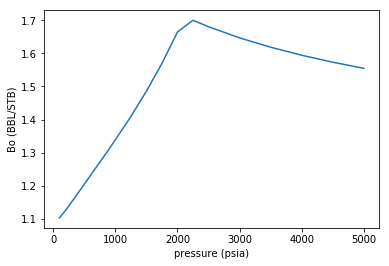

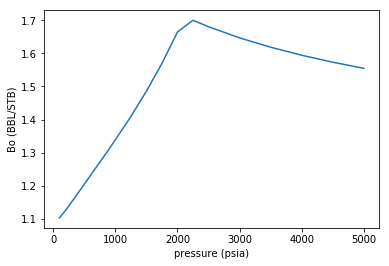

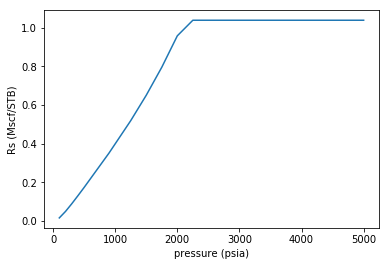

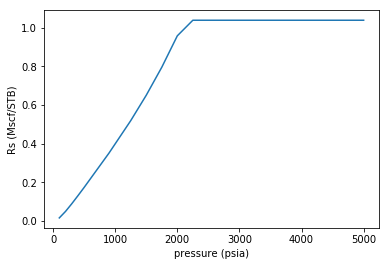

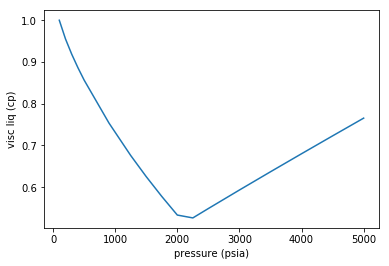

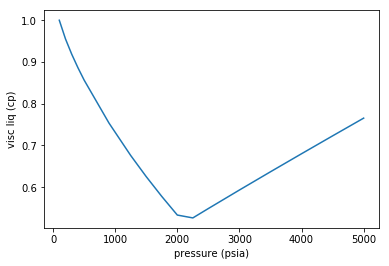

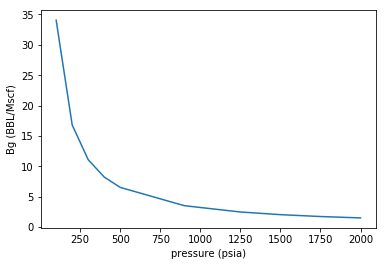

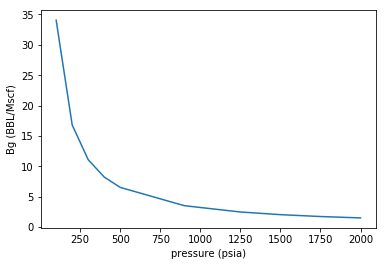

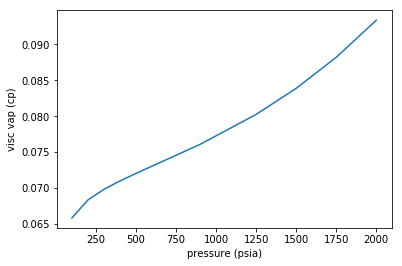

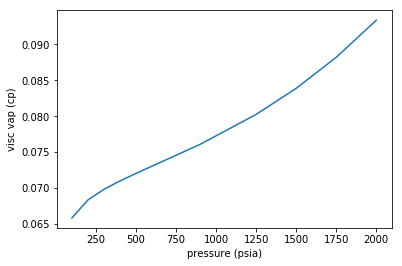

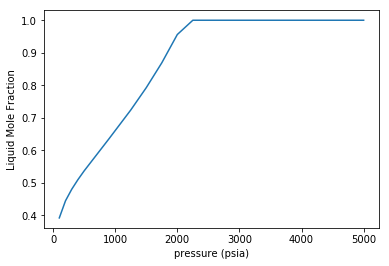

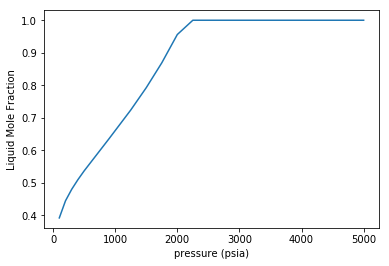

In [26]:
if fluid=='OIL':
 PVTO,PVDG=PVTO_PVDG_func(P_list,Bg,visc_vap_list,L1_list,Rs,Bo,visc_liq_list)
 plt.plot(PVTO['Pressure (psia)'],PVTO['Bo (BBL/STB)'])
 plt.ylabel ('Bo (BBL/STB)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 # 
 plt.plot(PVTO['Pressure (psia)'],PVTO.index)
 plt.ylabel ('Rs (Mscf/STB)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 #  
 plt.plot (PVTO['Pressure (psia)'],PVTO['visc_liq (cp)'])
 plt.ylabel ('visc liq (cp)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 #
 plt.plot(PVDG.index,PVDG['Bg (BBL/Mscf)'])
 plt.ylabel ('Bg (BBL/Mscf)')
 plt.xlabel ('pressure (psia)')
 plt.show()

 #
 plt.show()
 plt.plot (PVDG.index, PVDG['visc_vap (cp)'])
 plt.ylabel ('visc vap (cp)')
 plt.xlabel ('pressure (psia)')
 plt.show()
 #
 plt.plot (P_list,L1_list)
 plt.ylabel ('Liquid Mole Fraction')
 plt.xlabel ('pressure (psia)')
 plt.show()

In [ ]:
#------Complicated Separator----------
z1= [0.2, 0.4, 0.25, 0.15]
#z1=[0.19, 0.31, 0.38, 0.12]
#initializing the values
moles_V1=0.1

moles_V2=0.0
moles_V3=0.0
moles_V4=0.0
moles_L1=0.1
moles_L2=0.0
moles_L3=0.0
moles_L4=0.0
output_moles=0.0
#y3 initialized as it only is available for Separator 2 in second iteration
y3=[0,0,0,0]
feed_sep2=[0,0,0,0]
 
iter=1
#while abs((1+moles_L4)/(moles_L1+moles_V1)-1.0)>0.01 and iter<=100:
while abs (1-output_moles)>0.01 and iter<=20:
 print ('iter=',iter)
 print ('z1=',z1)
#--Sep 1---
 x1,y1,L1,V1,zeta_l1,liq_v1,zeta_v1,vap_v1=workflow(1750,160, z1)
 moles_L1=(1+moles_L4)*L1
 moles_V1=(1+moles_L4)*V1
 print ('Sep 1')
 print('x1=',x1,) 
 print('y1=',y1)
 print ('L1=',L1,'V1=',V1)
 print('moles_L1=',moles_L1,'moles_V1=',moles_V1)
#---feed composition for Sep 2 ---
 for i in range (0,len(z1)):
    feed_sep2[i]=(y1[i]*moles_V1+y3[i]*moles_V3)/(moles_V1+moles_V3)
 print ('moles_V1=',moles_V1,'moles_V3=',moles_V3)
 print ('feed_sep2=',feed_sep2)
#--Sep 2-------
 x2,y2,L2,V2,zeta_l2,liq_v2,zeta_v2,vap_v2=workflow(100,-150,feed_sep2)
 moles_V2=(moles_V1+moles_V3)*V2
 moles_L2=(moles_V1+moles_V3)*L2
 print ('Sep 2')
 print('x2=',x2)
 print('y2=',y2)
 print ('L2=',L2,'V2=',V2)
 print('moles_L2=',moles_L2,'moles_V2=',moles_V2)
#--Sep 3 ------
 x3,y3,L3,V3,zeta_l3,liq_v3,zeta_v3,vap_v3=workflow(100,70,x1)
 moles_V3=moles_L1*V3
 moles_L3=moles_L1*L3
 print ('Sep 3')
 print('x3=',x3)
 print ('y3=',y3)
 print ('L3=',L3,'V3=',V3)
 print('moles_L3=',moles_L3,'moles_V3=',moles_V3)
#--Sep 4-------
 x4,y4,L4,V4,zeta_l4,liq_v4,zeta_v4,vap_v4=workflow(100,60,x2)
 moles_V4=moles_L2*V4
 moles_L4=moles_L2*L4
 print ('Sep 4')
 print('x4=',x4) 
 print('y4=',y4)
 print ('L4=',L4,'V4=',V4)
 print('moles_L4=',moles_L4,'moles_V4=',moles_V4)
    
 output_moles=moles_V2+moles_V4+moles_L3
 print ('output_moles=',output_moles)
#---feed composition for Sep 1 ---
 for i in range (0,len(z1)):
    z1[i]=(z1[i]+moles_L4*x4[i])/(1+moles_L4)
 print ('z1=',z1)
 iter=iter+1

    

  

In [ ]:
#P_Diff=[5000,4500,4000,3500,3000,2500,2000,1500,1000,500,100,50,14.7]
P_Diff=[3000,2000,1000,15]
list_liq_v1=[]
list_L1=[]

def DL_func(P_Diff,T_res,z1):
 # Calculate residual at 14.7psia and 60 Deg.F
 for P in P_Diff:
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res, z1)
  list_liq_v1.append(liq_v1)
  list_L1.append(L1)
  z1=x1
 return (P_Diff,list_liq_v1,list_L1)

(P_Diff,list_liq_v1,list_L1)=DL_func(P_Diff, T_res, z1)

DiffLib= pd.DataFrame(list(zip(P_Diff,list_liq_v1,list_L1)), 
               columns =[ 'Pressure (psia)','liq_v1','Liquid Mole Fraction'])
DiffLib


In [ ]:
x2000,y2000,L2000,V2000,zeta_l2000,zeta_v2000,liq_v2000,vap_v2000=workflow(2000,232,z1)
print('x2000=',x2000,'L2000=',L2000,'liq_v2000=',liq_v2000,'L2000=',L2000)

x1000,y1000,L1000,V1000,zeta_l1000,zeta_v1000,liq_v1000,vap_v1000=workflow(1000,232,x2000)
print('x1000=',x1000,'L1000=',L1000,'liq_v1000=',liq_v1000,'L1000=',L1000)

x15,y15,L15,V15,zeta_l15,zeta_v15,liq_v15,vap_v15=workflow(14.7,232,x1000)
print('x15=',x15,'L15=',L15,'liq_v15=',liq_v15,'L15=',L15)
